CREATING A SINGLE LAYER NEURAL NETWORK

In [1]:
import torch

In [2]:
features = torch.randn((1,5))
features #Randomly distributed according normal distribution with mean of zero and std is 1
#one and five columns as the input features

tensor([[ 2.5386, -1.3023,  0.6370,  1.4910,  0.1530]])

In [3]:
weights = torch.randn_like(features)
weights #with same shape and same distribution such that normal distribution

tensor([[-0.8773, -0.0661, -1.9182, -0.0184, -1.2538]])

In [4]:
bias = torch.randn((1,1))
bias

tensor([[-0.1519]])

In [5]:
def activation(x):
  return 1/(1+torch.exp(-x))#sigmoid function

In [6]:
features*weights

tensor([[-2.2270,  0.0860, -1.2218, -0.0275, -0.1919]])

In [7]:
torch.sum(features*weights)

tensor(-3.5821)

In [8]:
torch.sum(features*weights)+bias

tensor([[-3.7340]])

In [9]:
y = activation(torch.sum(features*weights)+bias) # sigmoid of y=Wx+c i.e features*weights + bias
y

tensor([[0.0233]])

In [10]:
(features*weights).sum()

tensor(-3.5821)

In [11]:
# other way 

y= activation((features*weights).sum()+bias)
y

tensor([[0.0233]])

In [12]:
torch.mm(features,weights)#because (1,5) and (1,5) is the shape of both 
#but matrix multiplication rule is no of cols in first matrix = no of rows in second tensor

RuntimeError: ignored

In [13]:
torch.mm(features,weights.view(5,1))#view can return a new tensor with same data with size of 1,5

tensor([[-3.5821]])

In [14]:
activation(torch.mm(features,weights.view(5,1))+bias)

tensor([[0.0233]])

In [15]:
weights

tensor([[-0.8773, -0.0661, -1.9182, -0.0184, -1.2538]])

In [16]:
weights.view(5,1)

tensor([[-0.8773],
        [-0.0661],
        [-1.9182],
        [-0.0184],
        [-1.2538]])

In [17]:
weights.view(-1,1)#expanding in row wise

tensor([[-0.8773],
        [-0.0661],
        [-1.9182],
        [-0.0184],
        [-1.2538]])

In [18]:
weights.view(1,-1)#expanding in column wise

tensor([[-0.8773, -0.0661, -1.9182, -0.0184, -1.2538]])

MULTILAYER NEURAL NETWORK

In [19]:
features = torch.randn((1,3))
n_input = features.shape[1] # Number of columns 
n_hidden = 2 # Number of hidden units
n_output = 1 # Number of output units
print(n_input)

3


In [20]:
w1 = torch.randn(n_input,n_hidden) # weights matrix of input layer ,3 columns and 2 neurons
print(w1.size())
w2 = torch.randn(n_hidden,n_output)#weight matrix for output layer , from 2 neuron and 1 output neurons
print(w2.size())

torch.Size([3, 2])
torch.Size([2, 1])


In [21]:
b1 = torch.randn((1,n_hidden)) # Every neuron requires one bias such that hidden1 layer has 2 neurons so two bias
print(b1.shape)
b2 = torch.randn(1,n_output) # output layer has one neuron so one bias
print(b2.size())

torch.Size([1, 2])
torch.Size([1, 1])


In [22]:
hidden = activation(torch.mm(features,w1)+b1) #1x3 multiplied with 3x2 weights = 1x2
print(hidden.size())
output = activation(torch.mm(hidden,w2)+b2)#1x2 multiplied with 2x1 = 1x1
print(output)

torch.Size([1, 2])
tensor([[0.6842]])


In [23]:
#hidden units is hyperparameter

NUMPY TO TORCH AND BACK

In [24]:
import numpy as np
a = np.random.rand(4,3)
a

array([[0.93369073, 0.73491376, 0.34827953],
       [0.38211206, 0.936303  , 0.01699148],
       [0.56448253, 0.67820927, 0.59934274],
       [0.32547502, 0.88057929, 0.39487629]])

In [25]:
b = torch.from_numpy(a)#Numpy to  tensor
b

tensor([[0.9337, 0.7349, 0.3483],
        [0.3821, 0.9363, 0.0170],
        [0.5645, 0.6782, 0.5993],
        [0.3255, 0.8806, 0.3949]], dtype=torch.float64)

In [26]:
c = b.numpy() # torch to numpy
c

array([[0.93369073, 0.73491376, 0.34827953],
       [0.38211206, 0.936303  , 0.01699148],
       [0.56448253, 0.67820927, 0.59934274],
       [0.32547502, 0.88057929, 0.39487629]])

In [27]:
b.mul_(0) # repalce the values 
#but intution is here shared memory of variable not creating a new memory results in effect of numy with change of torch

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [28]:
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [29]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

NEURAL NETWORK WITH PYTORCH

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt


In [32]:
from torchvision import datasets, transforms # torchvision have datasets

In [33]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),]) 
transform # Transform to tensor and normalize the data

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [34]:
trainset = datasets.MNIST(root="~/.pytorch/MNIST_data/",download=True,train=True,transform=transform)
trainset #Dowloading the dataset of train

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [35]:
trainloader = torch.utils.data.DataLoader(dataset=trainset,batch_size=64,shuffle=1)
trainloader #Loading the dataset of train

In [36]:
dataiter = iter(trainloader)
images,labels=dataiter.next()
print(images.shape,labels.shape)#batch size is 64 means 64 records, 1 color channel,28x28 image

torch.Size([64, 1, 28, 28]) torch.Size([64])


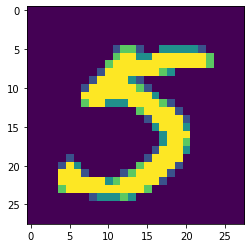

In [37]:
plt.imshow(X =images[0].numpy().squeeze(),) #first image display
plt.show()

In [38]:
images.view(images.shape[0],-1).shape # 28X28=784 , coverting the 3D to 2D vector for neural network

torch.Size([64, 784])

In [39]:
images.shape

torch.Size([64, 1, 28, 28])

In [40]:
a = torch.ones((3,4))
b = torch.ones((4,3))

In [41]:
print(a.shape,b.shape)

torch.Size([3, 4]) torch.Size([4, 3])


In [42]:
a.sum(dim=0)#row  sum 3x4 to 1x4

tensor([3., 3., 3., 3.])

In [43]:
b.sum(dim=0)

tensor([4., 4., 4.])

In [44]:
a.sum(dim=1)# columns sum 3x4 to 1x3

tensor([4., 4., 4.])

In [45]:
b.sum(dim=1)

tensor([3., 3., 3., 3.])

In [79]:
c=torch.randn(2,2)
c

tensor([[-0.1040, -2.0017],
        [ 0.2081, -0.2982]])

In [80]:
c.sum(dim=0)

tensor([ 0.1041, -2.2999])

In [81]:
-0.1040+0.2081 

0.10410000000000001

In [82]:
-2.0017+-0.2982

-2.2999

In [83]:
c.sum(dim=1)

tensor([-2.1057, -0.0901])

In [84]:
-0.1040 -2.0017

-2.1057

In [85]:
0.2081 -0.2982

-0.09010000000000001

In [47]:
inputs = images.view(images.shape[0],-1) #Flatten the input images
inputs.shape

torch.Size([64, 784])

In [48]:
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs,w1)+b1)
print(h.shape)

out = torch.mm(h,w2) + b2

torch.Size([64, 256])


In [49]:
out.shape

torch.Size([64, 10])

In [50]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [51]:
probabilities = softmax(out)
print(probabilities.shape)

torch.Size([64, 10])


In [53]:
probabilities[:10]

tensor([[2.0673e-09, 5.9456e-10, 6.0840e-08, 1.3612e-06, 2.5902e-09, 8.1762e-10,
         2.9421e-09, 1.0000e+00, 1.6880e-11, 5.5032e-14],
        [3.5657e-07, 4.1361e-11, 7.9605e-04, 1.0088e-12, 4.0127e-11, 1.9590e-09,
         2.3853e-05, 9.9918e-01, 2.7961e-12, 6.4236e-12],
        [5.9701e-15, 6.7620e-17, 5.8264e-13, 2.1698e-19, 1.4876e-14, 1.6541e-13,
         1.2076e-14, 1.0000e+00, 8.2458e-18, 1.1826e-21],
        [2.3660e-14, 9.6395e-18, 8.2834e-12, 4.2747e-17, 1.9450e-11, 1.2867e-09,
         1.2136e-08, 1.0000e+00, 1.4001e-14, 1.0954e-14],
        [8.5614e-01, 1.0150e-09, 4.3181e-05, 1.7297e-12, 1.0818e-09, 1.3572e-05,
         8.2205e-06, 1.4379e-01, 4.3372e-17, 4.6191e-14],
        [2.5225e-07, 8.2890e-08, 9.8293e-01, 2.8688e-12, 8.4865e-15, 1.0204e-11,
         3.0131e-07, 1.7066e-02, 7.2021e-15, 1.5620e-14],
        [1.5986e-04, 3.0296e-05, 4.7576e-03, 9.3267e-10, 2.7918e-10, 5.7567e-09,
         2.0819e-03, 9.9297e-01, 1.2471e-09, 6.4037e-11],
        [3.5288e-05, 8.5474

In [54]:
labels_pred = probabilities.sum(dim=1)
print(labels_pred.shape)
labels_pred

torch.Size([64])


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

SOFTMAX FOCUS

In [56]:
torch.exp(out).shape

torch.Size([64, 10])

In [59]:
torch.sum(torch.exp(out),dim=1).shape #Summation of across the columns

torch.Size([64])

In [61]:
torch.sum(torch.exp(out),dim=1)[:10]

tensor([3.6466e+07, 9.8549e+06, 6.2081e+12, 4.5538e+10, 1.1247e+07, 2.2099e+08,
        3.2127e+05, 8.7027e+04, 8.1210e+07, 3.7152e+08])

In [64]:
torch.sum(torch.exp(out),dim=1).view(-1,1).shape

torch.Size([64, 1])

In [66]:
torch.sum(torch.exp(out),dim=1).view(-1,1)[:3]

tensor([[3.6466e+07],
        [9.8549e+06],
        [6.2081e+12]])

In [68]:
# def softmax(x):
#   return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

USING NN LIBRARY

In [70]:
from torch import nn

In [71]:
class Network(nn.Module):
  def __init__(self):
    super().__init__() # it creates class from nn.Module that keep track the architecture
    # Inputs to hidden layer linear transformation such wx+b
    self.hidden = nn.Linear(784,256)
    # Input to the output layer
    self.output = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    #pass the input tensor through each of our operation
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    return x

In [72]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [74]:
import torch.nn.functional as F

In [75]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
  def forward(self,x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x),dim=1)
    return x


In [76]:
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
  def forward(self,x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.softmax(x,dim=1)
    return x
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [79]:
print(model.fc1.weight.shape) # automaticall creating weight and bias of each layer when we use nn.Linear
print(model.fc1.bias.shape)

torch.Size([128, 784])
torch.Size([128])


In [80]:
model.fc1.weight

Parameter containing:
tensor([[-0.0336,  0.0154,  0.0150,  ..., -0.0122,  0.0048,  0.0143],
        [ 0.0237, -0.0282,  0.0301,  ..., -0.0339, -0.0063,  0.0296],
        [ 0.0059, -0.0356, -0.0161,  ...,  0.0322,  0.0091,  0.0020],
        ...,
        [-0.0017,  0.0069,  0.0318,  ..., -0.0135,  0.0311, -0.0201],
        [-0.0338,  0.0219,  0.0110,  ...,  0.0167,  0.0031,  0.0040],
        [ 0.0034,  0.0319,  0.0118,  ..., -0.0215,  0.0031,  0.0252]],
       requires_grad=True)

In [81]:
model.fc1.weight.data

tensor([[-0.0336,  0.0154,  0.0150,  ..., -0.0122,  0.0048,  0.0143],
        [ 0.0237, -0.0282,  0.0301,  ..., -0.0339, -0.0063,  0.0296],
        [ 0.0059, -0.0356, -0.0161,  ...,  0.0322,  0.0091,  0.0020],
        ...,
        [-0.0017,  0.0069,  0.0318,  ..., -0.0135,  0.0311, -0.0201],
        [-0.0338,  0.0219,  0.0110,  ...,  0.0167,  0.0031,  0.0040],
        [ 0.0034,  0.0319,  0.0118,  ..., -0.0215,  0.0031,  0.0252]])

In [82]:
model.fc1.bias.data

tensor([ 1.1252e-02,  1.5265e-02,  1.9129e-02,  2.8573e-02,  1.2431e-02,
        -1.5864e-04,  1.3605e-02,  3.0289e-02, -2.9530e-03,  2.7354e-02,
        -1.6391e-02,  2.5072e-02,  1.9542e-02, -4.1146e-03,  3.4299e-02,
         6.4008e-03, -5.7743e-03,  1.9164e-02, -4.6290e-03,  2.2193e-02,
        -3.5588e-02, -2.5481e-02,  7.6010e-03, -1.3508e-03,  2.8738e-03,
        -1.4224e-02,  2.2323e-02,  2.9683e-02,  2.6478e-02, -2.9019e-02,
        -3.5453e-02, -1.8938e-02,  1.0328e-02, -7.5958e-03, -3.5432e-02,
         1.5465e-02,  2.0136e-02,  2.1675e-02, -2.4826e-02, -5.8938e-03,
        -3.3419e-02,  3.5031e-02,  2.9275e-02, -2.3739e-02,  2.1471e-02,
         1.8599e-03,  1.9134e-02, -3.0807e-04, -1.9077e-02, -2.1032e-06,
        -4.7078e-03,  2.6002e-02, -1.2251e-03, -3.1809e-02,  3.0891e-02,
         4.1139e-04,  2.7596e-02, -2.0962e-02, -5.9299e-03, -9.5793e-03,
         2.1533e-02, -3.2811e-03,  3.0884e-02, -1.5907e-03, -2.2511e-02,
        -4.5268e-03,  2.9938e-02, -2.1884e-02,  1.8

In [83]:
model.fc1.bias.data.fill_(0)#set the bias value to zero

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [84]:
model.fc1.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [85]:
model.fc1.weight.data.normal_(std=0.01)# normal distribution with standard distribution is 0.01

tensor([[ 0.0076,  0.0078, -0.0057,  ...,  0.0019,  0.0071,  0.0079],
        [-0.0207,  0.0003, -0.0089,  ..., -0.0121,  0.0067,  0.0027],
        [-0.0139,  0.0023,  0.0105,  ..., -0.0099, -0.0152,  0.0212],
        ...,
        [ 0.0120,  0.0022, -0.0052,  ..., -0.0023, -0.0028,  0.0058],
        [ 0.0048,  0.0056, -0.0100,  ..., -0.0190, -0.0096, -0.0100],
        [ 0.0007,  0.0034, -0.0061,  ...,  0.0102,  0.0136,  0.0037]])

Forward PASS

In [87]:
dataiter = iter(trainloader)
images.resize_(64,1,784)
img_idx = 0 
ps = model.forward(images[img_idx,:])# passing the 0th index for prediction
ps.shape

torch.Size([1, 10])

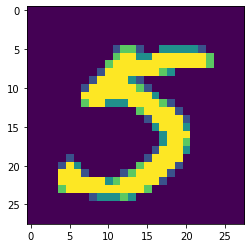

In [89]:
plt.imshow(images[img_idx,:].view(1,1,28,28).numpy().squeeze())

In [90]:
ps

tensor([[0.0955, 0.1115, 0.0924, 0.0964, 0.1027, 0.1099, 0.0915, 0.0992, 0.0996,
         0.1012]], grad_fn=<SoftmaxBackward>)

In [91]:
#Hyper parameters for our network
input_size = 784
hidden_sizes = [128,64]
output_size = 10



In [92]:
# Build a feed-fowrd network
model = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.Softmax(dim=1)
                      )
print(model)



Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [93]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [94]:
model[1]

ReLU()

In [95]:
model[0].weight

Parameter containing:
tensor([[ 0.0225, -0.0195, -0.0137,  ..., -0.0098, -0.0151,  0.0071],
        [-0.0013, -0.0158,  0.0204,  ...,  0.0116, -0.0238,  0.0003],
        [-0.0047,  0.0049, -0.0119,  ...,  0.0268,  0.0029, -0.0245],
        ...,
        [-0.0205,  0.0145,  0.0099,  ..., -0.0306, -0.0044, -0.0189],
        [-0.0325,  0.0186,  0.0128,  ..., -0.0275, -0.0254,  0.0139],
        [ 0.0058,  0.0231,  0.0151,  ..., -0.0047,  0.0288, -0.0025]],
       requires_grad=True)

In [96]:
from collections import OrderedDict

In [98]:
model = nn.Sequential(OrderedDict([
                                   ("fc1",nn.Linear(input_size,hidden_sizes[0])),
                                   ("relu1",nn.ReLU()),
                                   ("fc2",nn.Linear(hidden_sizes[0],hidden_sizes[1])),
                                   ("relu2",nn.Linear(hidden_sizes[1],output_size)),
                                   ("output",nn.Softmax(dim=1))
                                  ])
                      )

In [99]:
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): Linear(in_features=64, out_features=10, bias=True)
  (output): Softmax(dim=1)
)

In [100]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [102]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)